### **DL_PART_1_TEXT_GENERATION**

TWITTER SCRAPING PART 

In [1]:
class TwitterClient(object): 
    def __init__(self): 
        #Initialization method. 
        consumer_key='D5CvS7MrSfSoigFQFkQ5sioi4'
        consumer_secret='ci9IHZPJ2l8oX4rIolOzv359sq7iQ5vPVGuVHJW96IWIT3nyzD'
        access_token='165879850-d6GPXrp2nhM6qJG2lKleOcCJSZRhED435N8sgxD8'
        access_token_secret='kQsvtXf5pajEiqT6L2HOpxN9BYakrWDOHmsMKo0C6j18U'
        try: 
            auth = OAuthHandler(consumer_key, consumer_secret) 
            auth.set_access_token(access_token, access_token_secret) 
            self.api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
            
        except tweepy.TweepError as e:
            print(f"Error: Tweeter Authentication Failed - \n{str(e)}")

    def get_tweets(self, query, maxTweets = 1000):
        tweets = [] 
        sinceId = None
        max_id = -1
        tweetCount = 0
        tweetsPerQry = 100

        while tweetCount < maxTweets:
            try:
                if (max_id <= 0):
                    if (not sinceId):
                        new_tweets = self.api.search(q=query, count=tweetsPerQry)
                    else:
                        new_tweets = self.api.search(q=query, count=tweetsPerQry,
                                                since_id=sinceId)
                else:
                    if (not sinceId):
                        new_tweets = self.api.search(q=query, count=tweetsPerQry,
                                                max_id=str(max_id - 1))
                    else:
                        new_tweets = self.api.search(q=query, count=tweetsPerQry,
                                                max_id=str(max_id - 1),
                                                since_id=sinceId)
                if not new_tweets:
                    print("No more tweets found")
                    break

                for tweet in new_tweets:
                    parsed_tweet = {} 
                    parsed_tweet['tweets'] = tweet.text 

                    # appending parsed tweet to tweets list
                    if tweet.retweet_count > 0: 
                        # if tweet has retweets, ensure that it is appended only once 
                        if parsed_tweet not in tweets: 
                            tweets.append(parsed_tweet) 
                    else: 
                        tweets.append(parsed_tweet) 
                        
                tweetCount += len(new_tweets)
                print("Downloaded {0} tweets".format(tweetCount))
                max_id = new_tweets[-1].id

            except tweepy.TweepError as e:
                # Just exit if any error
                print("Tweepy error : " + str(e))
                break
        
        return pd.DataFrame(tweets)

In [ ]:
import tweepy
import csv
#Twitter API credentials
consumer_key='D5CvS7MrSfSoigFQFkQ5sioi4'
consumer_secret='ci9IHZPJ2l8oX4rIolOzv359sq7iQ5vPVGuVHJW96IWIT3nyzD'
access_token='165879850-d6GPXrp2nhM6qJG2lKleOcCJSZRhED435N8sgxD8'
access_token_secret='kQsvtXf5pajEiqT6L2HOpxN9BYakrWDOHmsMKo0C6j18U'
# Authorize our Twitter credentials
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)
import pandas as pd
userID = "learnenglish"
tweets = api.user_timeline(screen_name=userID, 
                           count=200,
                           include_rts = False,
                           tweet_mode = 'extended'
                           )
for info in tweets[:5000]:
     data=pd.DataFrame([info.full_text])
     print(info.full_text)
     print("\n")

Do you know what is the difference between 'hand out' and 'handout'?  https://t.co/kRupkTxIbU #LearnEnglish #ESL #EAL


There are a few different ways to pronounce 'ough' in English words. Read on to learn more. https://t.co/kCfj79BAoN #LearnEnglish #ESL #EAL


Lawrence and Charlotte talk about their weekend and what’s happening in and around the office. #learnenglish #ESL #EAL https://t.co/HAgXaYm8an


Here are some useful light idioms that you can use in everyday English.  https://t.co/TglcStlMbW #LearnEnglish #ESL #EAL


Using who, whom, whose and who’s can be very confusing in English. We break down the confusion in this video. For a transcript: https://t.co/tlROkgwkYH #LearnEnglish #ESL #EAL https://t.co/nHOIe5GWUe


In 1972, Australians had to learn a new way to describe the weather, when the Bureau of Meteorology changed to the metric system. This ABC News report explains the change in terms such as 'fahrenheit', to degrees 'celsius'. #learnenglish #ESL #EAL https://t.co/Ao79E5j

In [ ]:
all_tweets = []
all_tweets.extend(tweets)
oldest_id = tweets[-1].id
while True:
    tweets = api.user_timeline(screen_name=userID,
                           count=200,
                           include_rts = False,
                           max_id = oldest_id - 1,
                           tweet_mode = 'extended'
                           )
    if len(tweets) == 0:
        break
    oldest_id = tweets[-1].id
    all_tweets.extend(tweets)
    print('N of tweets downloaded till now {}'.format(len(all_tweets)))

N of tweets downloaded till now 399
N of tweets downloaded till now 596
N of tweets downloaded till now 795
N of tweets downloaded till now 994
N of tweets downloaded till now 1191
N of tweets downloaded till now 1391
N of tweets downloaded till now 1590
N of tweets downloaded till now 1789
N of tweets downloaded till now 1988
N of tweets downloaded till now 2188
N of tweets downloaded till now 2388
N of tweets downloaded till now 2587
N of tweets downloaded till now 2785
N of tweets downloaded till now 2984
N of tweets downloaded till now 3184
N of tweets downloaded till now 3194


In [ ]:
#transform the tweepy tweets into a 2D array that will populate the csv	
from pandas import DataFrame
outtweets = [[tweet.full_text.encode("utf-8").decode("utf-8")] 
             for idx,tweet in enumerate(all_tweets)]
df = DataFrame(outtweets,columns=["text"])
df.to_csv('%s_tweets.csv' % userID,index=False)
df.head(3)

,text
0,Do you know what is the difference between 'ha...
1,There are a few different ways to pronounce 'o...
2,Lawrence and Charlotte talk about their weeken...


In [ ]:
df.shape

(3194, 1)

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np
import pandas as pd
import re

In [ ]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",

                           "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",

                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",

                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",

                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",

                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",

                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",

                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",

                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",

                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",

                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",

                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",

                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",

                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",

                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",

                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",

                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",

                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",

                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",

                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",

                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",

                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",

                           "you're": "you are", "you've": "you have"}

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
STOP_WORDS = set(stopwords.words('english')) 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
def CLEAN_TEXT(text):
    text = text.lower()
    #text = text.replace('\%','')
    text = re.sub('\[.*?\]', '', text)
    # text = re.compile('((https?):((//)|(\\\\))+([\w\d:#@%/;$()~_?\+-=\\\.&](#!)?)*)', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in text.split(" ")])    
    #text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = " ".join(filter(lambda x:x[0]!="@", text.split()))
    return text

In [ ]:
import regex as re
df['text'] = df['text'].apply(lambda x: CLEAN_TEXT(x))
df = df['text']

In [ ]:
df

0       do you know what is the difference between 'ha...
1       there are a few different ways to pronounce 'o...
2       lawrence and charlotte talk about their weeken...
3       here are some useful light idioms that you can...
4       using who, whom, whose and who’s can be very c...
                              ...                        
3189    harry harding used karaoke to learn another la...
3190    can and could are modal verbs. what is the dif...
3191    do you find that you cannot remember english w...
3192    these students learn english at a library. som...
3193    there are lots of ways to improve your english...
Name: text, Length: 3194, dtype: object

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df)
total_words = len(tokenizer.word_index) + 1
input_sequences = []
for line in df:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

5291


In [ ]:
max_sequence_length = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_length, padding='pre'))
# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
X_train,X_test,y_train,y_test=train_test_split(xs,ys,test_size=0.2,random_state=100)

## LSTM MODEL ARCHITECTURE

In [7]:
# 5291 - total_words # 55 max sequence length
model = Sequential()
model.add(Embedding(5291, 100, input_length=55-1))
model.add(LSTM(200, return_sequences=True))
model.add(LSTM(500))
model.add(tf.keras.layers.Dropout(0.4))
model.add(Dense(5291, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 54, 100)           529100    
_________________________________________________________________
lstm_2 (LSTM)                (None, 54, 200)           240800    
_________________________________________________________________
lstm_3 (LSTM)                (None, 500)               1402000   
_________________________________________________________________
dropout_1 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense (Dense)                (None, 5291)              2650791   
Total params: 4,822,691
Trainable params: 4,822,691
Non-trainable params: 0
_________________________________________________________________


In [9]:
!pip install plot_model

In [10]:
from keras.utils.vis_utils import plot_model

### PLOTTING THE MODEL

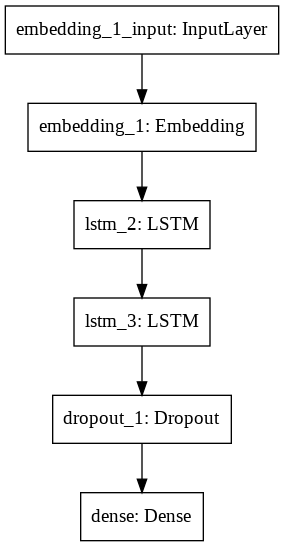

In [11]:
plot_model(model)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
es = EarlyStopping(monitor = 'val_loss',
                   mode = 'min',
                   verbose = 1,
                   patience = 2)

mc = ModelCheckpoint('best_model3.h5',
                    monitor = 'val_loss',
                    mode = 'min',
                    verbose = 1,
                    save_best_only = True)

## MODEL TRAINING PHASE

In [ ]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

history = model.fit(xs,ys,callbacks=[es,mc],epochs=35, verbose=1,validation_data=(X_test,y_test))

Epoch 1/35
2356/2356 [==============================] - 51s 21ms/step - loss: 6.0227 - accuracy: 0.0820 - val_loss: 5.2767 - val_accuracy: 0.1436

Epoch 00001: val_loss improved from inf to 5.27674, saving model to best_model3.h5
Epoch 2/35
2356/2356 [==============================] - 48s 20ms/step - loss: 5.2337 - accuracy: 0.1538 - val_loss: 4.7588 - val_accuracy: 0.2048

Epoch 00002: val_loss improved from 5.27674 to 4.75882, saving model to best_model3.h5
Epoch 3/35
2356/2356 [==============================] - 48s 20ms/step - loss: 4.7452 - accuracy: 0.2171 - val_loss: 4.2947 - val_accuracy: 0.2616

Epoch 00003: val_loss improved from 4.75882 to 4.29470, saving model to best_model3.h5
Epoch 4/35
2356/2356 [==============================] - 49s 21ms/step - loss: 4.3128 - accuracy: 0.2620 - val_loss: 3.8795 - val_accuracy: 0.2965

Epoch 00004: val_loss improved from 4.29470 to 3.87951, saving model to best_model3.h5
Epoch 5/35
2356/2356 [==============================] - 49s 21ms/ste

In [ ]:
!pip install rouge-score

In [ ]:
df[8]

"the word 'refuse' is pronounced differently when it is used as a verb and a noun. #learnenglish #esl #eal"

## SAVING THE MODEL

In [ ]:
model_json1 = model.to_json()
with open("model_final.json", "w") as json_file:
    json_file.write(model_json1)
# serialize weights to HDF5
model.save_weights("model_final.h5")

In [ ]:
from keras.models import model_from_json 

# opening and store file in a variable

json_file = open('model2.json','r')
loaded_model_json = json_file.read()
json_file.close()

# use Keras model_from_json to make a loaded model

loaded_model = model_from_json(loaded_model_json)

# load weights into new model

loaded_model.load_weights("model2.h5")
print("Loaded Model from disk")

# compile and evaluate loaded model

loaded_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


Loaded Model from disk


In [ ]:
df[20]

"what do english speakers mean when they say 'time flies' or that they are 'in the nick of time'? #learnenglish #esl #eal"

## PLOT TO COMPARE THE TRAIN TEST LOSSES

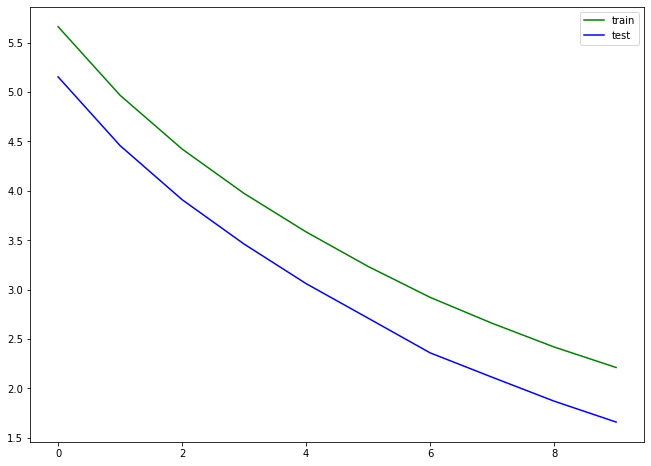

In [ ]:
from matplotlib import pyplot
pyplot.figure(figsize = (11,8))
pyplot.plot(history.history['loss'], label = 'train', color = 'green')
pyplot.plot(history.history['val_loss'], label = 'test', color = 'blue')
pyplot.legend()
pyplot.show()

In [ ]:
df[32]

'what is the difference between loose and lose? are you lost when it comes to the differences between lose and loose? don’t lose out! we explain the differences. more: #learnenglish #esl #eal'

In [ ]:
type(seed_text)

str

In [ ]:
df[20]

"linguist professor roly sussex and a caller from queensland discuss whether 'batsman' is an appropriate word for a female cricketer and how can sportspeople be addressed in a gender-neutral way. #eal #esl #learnenglish"

## TESTING THE MODEL

In [ ]:
seed_text = "what is the difference"
next_words = 25

In [ ]:
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_length - 1, padding='pre')
    predicted = np.argmax(model.predict(token_list), axis=-1)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

what is the difference between loose and lose are you lost when it comes to the differences between lose and loose don’t lose out we explain the differences more learnenglish esl eal vocabulary is the missing word and why 🤔 learnenglish esl eal heywire learn more learnenglish esl eal vocabulary learnenglish esl vocabulary vocabulary is correct and why 🤔 learnenglish esl eal vocabulary learnenglish esl vocabulary vocabulary learnenglish esl vocabulary vocabulary is the missing word and why 🤔 learnenglish esl eal vocabulary learnenglish esl vocabulary vocabulary is correct and why 🤔 learnenglish esl eal vocabulary learnenglish esl vocabulary vocabulary vocabulary in this correct binomial


In [ ]:
df[32]

'what is the difference between loose and lose? are you lost when it comes to the differences between lose and loose? don’t lose out! we explain the differences. more: #learnenglish #esl #eal'

## METRIC USED FOR EVALUATION OF TEXT GENERATED TEXT IS ROUGE SCORE. 

The Recall-Oriented Understudy for Gisting Evaluation (ROUGE) scoring algorithm calculates the similarity between a candidate document and a collection of reference documents. 

In [ ]:
from rouge_score import rouge_scorer
scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)
scores = scorer.score('what is the difference between loose and lose? are you lost when it comes to the differences between lose and loose? don’t lose out! we explain the differences.',
                      'what is the difference between loose and lose are you lost when it comes to the differences between lose and loose don’t lose out we explain the differences more.')

In [ ]:
scores

{'rouge1': Score(precision=0.9666666666666667, recall=1.0, fmeasure=0.983050847457627),
 'rougeL': Score(precision=0.9666666666666667, recall=1.0, fmeasure=0.983050847457627)}